## ИУ5-64Б Белозеров Д.С.

## Датасет: Pizza Sales

### 1) Текстовое описание набора данных

Этот набор данных содержит подробную информацию о заказах пиццы, включая спецификацию вариантов пиццы, количество, цены, даты, время и детали категоризации.

1) pizza_id: Уникальный идентификатор, присвоенный каждому отдельному варианту пиццы, доступному для заказа.

2) order_id: Уникальный идентификатор для каждого сделанного заказа, который связывается с несколькими пиццами.

3) pizza_name_id: Идентификатор, связанный с конкретным названием пиццы.

4) quantity: Количество единиц определенного варианта пиццы, заказанных в рамках заказа.

5) order_date: Дата размещения заказа.

6) order_time: Время размещения заказа.

7) unit_price: Стоимость одной единицы конкретного варианта пиццы.

8) total_price: Совокупная стоимость всех единиц определенного варианта пиццы в заказе.

9) pizza_size: Представляет размер пиццы (например, маленькая, средняя, большая).

10) pizza_category: Указывает категорию пиццы, такую как вегетарианская, не вегетарианская и т. д.

11) pizza_ingredients: Предоставляет список или описание ингредиентов, используемых в пицце.

12) pizza_name: Указывает название конкретного варианта пиццы, заказанной.



### Описание библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [ ]:
df = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')

### 2) Основные характеристики датасета

In [ ]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
# Статистическое описание числовых столбцов
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
# Заменяем сокращения размеров пиццы на полные названия
df['pizza_size'] = df['pizza_size'].replace({'S': 'Small', 'M': 'Medium', 'L': 'Large', 'XL': 'X-Large', 'XXL': 'XX-Large'}, inplace=False)

In [ ]:
# Группировка по 'order_id' и суммирование 'total_price' для каждого уникального заказа
total_sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()

total_sales_per_order

,order_id,total_price
0,1.0,13.25
1,2.0,92.00
2,3.0,37.25
3,4.0,16.50
4,5.0,16.50
...,...,...
21345,21346.0,62.25
21346,21347.0,66.50
21347,21348.0,46.70
21348,21349.0,20.25


### 3) Визуальное исследование датасета

Text(0, 0.5, 'Процент категории')

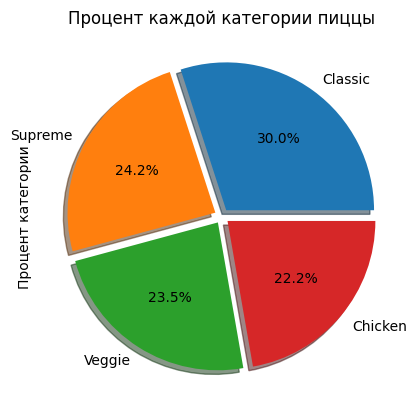

In [ ]:
# Процент онлайн-заказов в ресторанах
# Создает круговую диаграмму, отображающую процентное соотношение каждой категории пиццы.
# Значения для долей берутся из подсчета количества уникальных значений в столбце 'pizza_category' DataFrame `df`.
# Параметр `autopct="%0.1f%%"` добавляет процентные значения на каждый сегмент диаграммы с одним знаком после запятой.
# Параметр `explode` используется для выделения сегментов диаграммы, делая их немного выступающими из центра.
# Параметр `shadow=True` добавляет тень к диаграмме, делая ее более наглядной.
df['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Процент каждой категории пиццы')  # Заголовок графика
plt.ylabel('Процент категории')  # Подпись оси y

***Получение топ-5 самых популярных названий пиццы***

Text(0, 0.5, 'Количество')

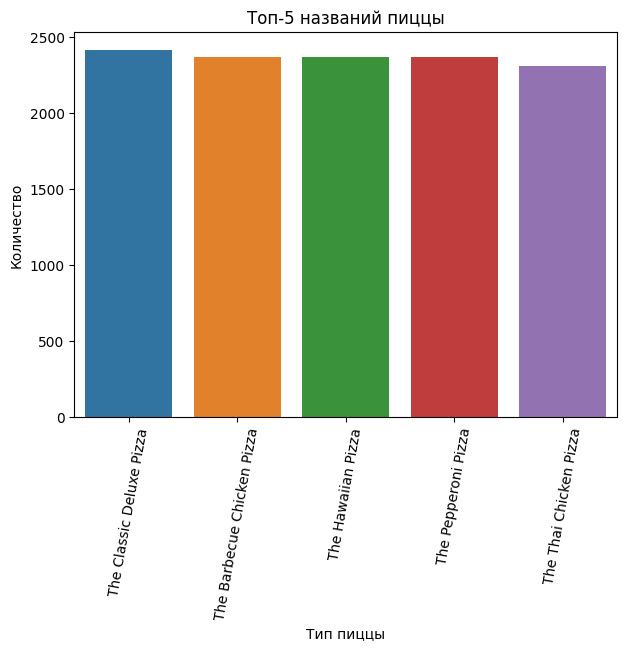

In [ ]:
Top_5_types = df['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pizza_name', order=Top_5_types)
plt.xticks(rotation=80)
plt.title('Топ-5 названий пиццы')
plt.xlabel('Тип пиццы')
plt.ylabel('Количество')


***Количество продаж пиццы каждого размера***

Text(0, 0.5, 'Количество пицц')

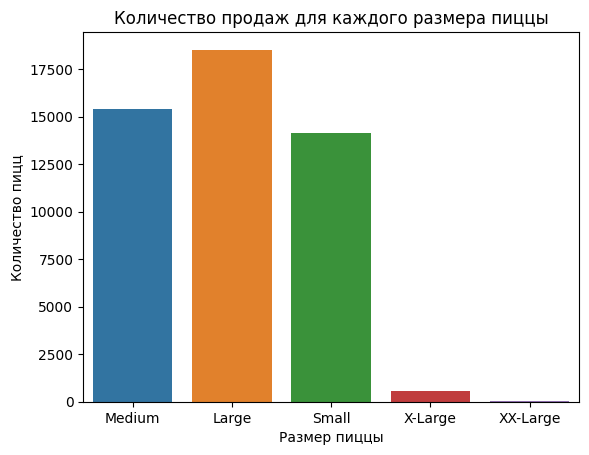

In [ ]:
sns.countplot(data =df , x= 'pizza_size')
plt.title('Количество продаж для каждого размера пиццы')
plt.xlabel('Размер пиццы')
plt.ylabel('Количество пицц')

***20 самых крупных клиентов оплатили заказы, чтобы оценить уровень обслуживания, предоставляемого им в то время***

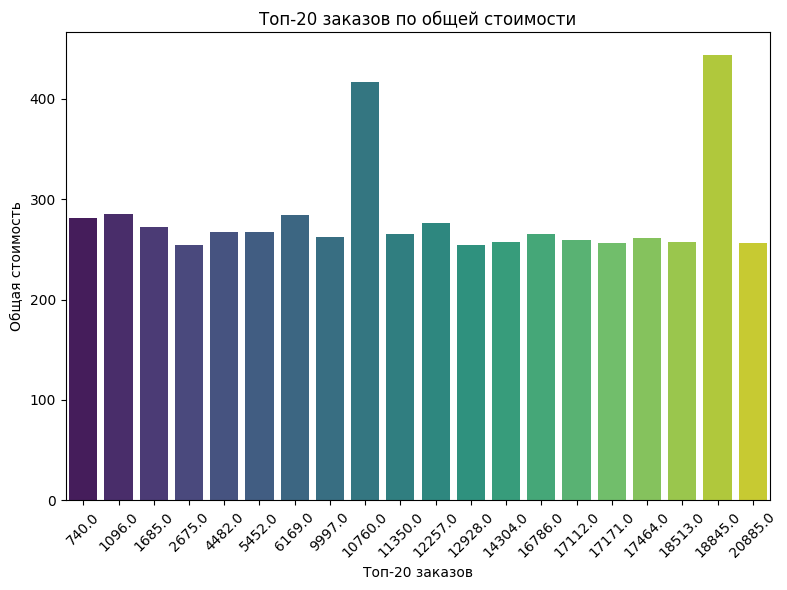

In [ ]:
# Группировка по order_id и суммирование total_price для каждого заказа
order_total_prices = df.groupby('order_id')['total_price'].sum().reset_index()

# Сортировка заказов по общей цене в порядке убывания
top_20_orders = order_total_prices.sort_values(by='total_price', ascending=False).head(20)

# Построение столбчатой диаграммы с использованием Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='order_id', y='total_price', data=top_20_orders, palette='viridis')
plt.title('Топ-20 заказов по общей стоимости')
plt.xlabel('Топ-20 заказов')
plt.ylabel('Общая стоимость')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Распределение по категориям пиццы и цене***

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Classic'),
  Text(1, 0, 'Veggie'),
  Text(2, 0, 'Supreme'),
  Text(3, 0, 'Chicken')])

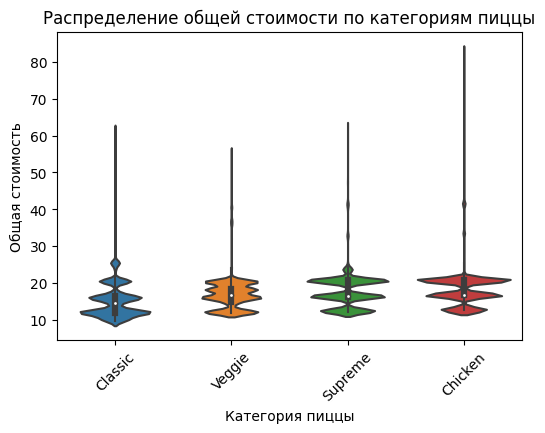

In [ ]:
# Скрипичная диаграмма для визуализации распределения числовых данных по категориям.
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='pizza_category', y='total_price')
plt.title('Распределение общей стоимости по категориям пиццы')
plt.xlabel('Категория пиццы')
plt.ylabel('Общая стоимость')
plt.xticks(rotation=45)

### 4) Информация о корреляции


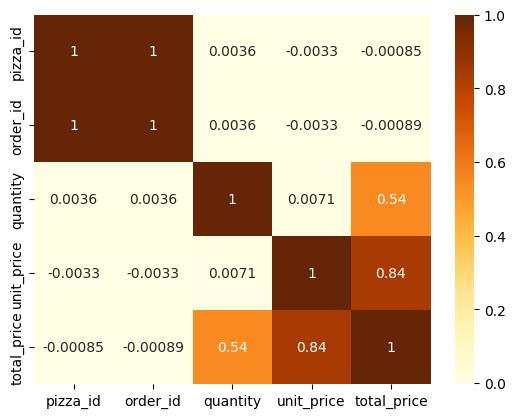

In [ ]:
# Корреляция для каждой колонки
numeric_columns = df.select_dtypes(include= ['number'])
# Параметр `annot=True` добавляет аннотации с числовыми значениями в каждую ячейку тепловой карты
sns.heatmap(numeric_columns.corr(),cmap = 'YlOrBr', annot =True)
plt.show()